# **Hotel Reservation Cancellation Prediction**
Type: Classification

This project aims to predict whether a customer will cancel their hotel reservation
based on various booking details, such as lead time, room type, and past behavior.
By analyzing patterns in customer reservations,
the project helps hotels minimize revenue loss caused by cancellations.


My Data Link :https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score


# **Read Data**


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Hotel Reservations.csv')
df.head(15)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [ ]:
df.shape

(36275, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


# **Eliminating duplicates**

In [ ]:
df.duplicated().sum()
# df.drop_duplicates(inplace=True)

0

# **Eliminating all extra variables**


In [ ]:
df.drop(['Booking_ID'],axis=1,inplace=True)

#**Scaling and Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=["number"]).columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])
df[numeric_columns] = scaled_data

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['type_of_meal_plan']=label_encoder.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved']=label_encoder.fit_transform(df['room_type_reserved'])
df['market_segment_type']=label_encoder.fit_transform(df['market_segment_type'])
df['booking_status']=label_encoder.fit_transform(df['booking_status'])

# **Detecting and Removing Outliers**

<Axes: ylabel='lead_time'>

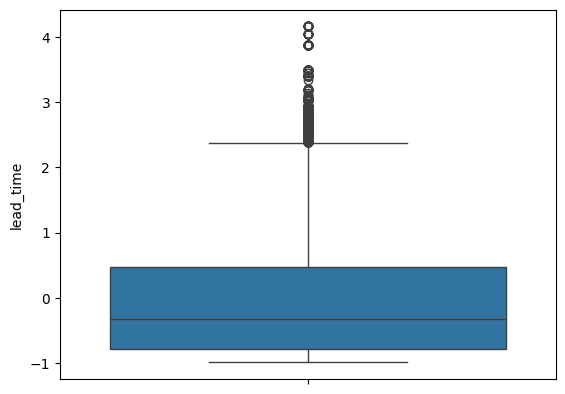

In [ ]:
sns.boxplot(df['lead_time'])

In [ ]:
numeric_columns = df.select_dtypes(include=["number"])
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Filtering data to remove outliers
df = df[~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: ylabel='lead_time'>

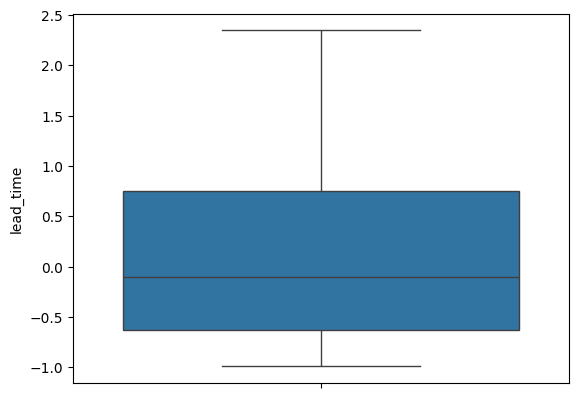

In [ ]:
#using box plot to ensure that your data dont have outliers
sns.boxplot(df['lead_time'])

# **Eliminating blank spaces or missing information**

In [ ]:
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].str.strip().str.lower()

# **Arranging the data logically and sequentially so that it is easy to visualize**

In [ ]:
logical_arrang = [
    "arrival_year",
    "arrival_month",
    "arrival_date",
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "type_of_meal_plan",
    "required_car_parking_space",
    "room_type_reserved",
    "lead_time",
    "market_segment_type",
    "repeated_guest",
    "no_of_previous_cancellations",
    "no_of_previous_bookings_not_canceled",
    "avg_price_per_room",
    "no_of_special_requests",
    "booking_status",
]
df = df[logical_arrang]

# **Grouping data in rows and columns or horizontally and vertically will help in data arrangement and also proper visualization**

In [ ]:
data_info_cleaned = df.info()
data_sample_cleaned = df.head()

data_info_cleaned, data_sample_cleaned

<class 'pandas.core.frame.DataFrame'>
Index: 8957 entries, 3 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   arrival_year                          8957 non-null   float64
 1   arrival_month                         8957 non-null   float64
 2   arrival_date                          8957 non-null   float64
 3   no_of_adults                          8957 non-null   float64
 4   no_of_children                        8957 non-null   float64
 5   no_of_weekend_nights                  8957 non-null   float64
 6   no_of_week_nights                     8957 non-null   float64
 7   type_of_meal_plan                     8957 non-null   int64  
 8   required_car_parking_space            8957 non-null   float64
 9   room_type_reserved                    8957 non-null   int64  
 10  lead_time                             8957 non-null   float64
 11  market_segment_type  

(None,
     arrival_year  arrival_month  arrival_date  no_of_adults  no_of_children  \
 3       0.467843      -0.789501      0.503757      0.298893        -0.26147   
 22      0.467843      -1.440999      0.503757      0.298893        -0.26147   
 23      0.467843       0.839242     -0.297128      0.298893        -0.26147   
 25      0.467843      -1.115250      1.419055      0.298893        -0.26147   
 31      0.467843       1.164990     -0.297128      0.298893        -0.26147   
 
     no_of_weekend_nights  no_of_week_nights  type_of_meal_plan  \
 3              -0.931190          -0.144803                  0   
 22              1.365993           1.272747                  0   
 23             -0.931190           0.563972                  0   
 25             -0.931190          -0.144803                  0   
 31              1.365993          -0.144803                  0   
 
     required_car_parking_space  room_type_reserved  lead_time  \
 3                    -0.178819          

# **Dealing with Inconsistent Data Entry**

In [ ]:
df['market_segment_type'] = df['market_segment_type'].replace(['Online', 'online', 'ONLINE'], 'Online')
df['market_segment_type'] = df['market_segment_type'].replace(['Offline', 'offline', 'OFFLINE'], 'Offline')
df['type_of_meal_plan'] = df['type_of_meal_plan'].replace(['Meal Plan 1', 'meal plan 1'], 'Meal Plan 1')

print(df['market_segment_type'].unique())
print(df['type_of_meal_plan'].unique())

[4 3 2]
[0]


# **EDA**

In [ ]:
# Show unique  and number of labels in target column
print(df['booking_status'].value_counts())
print(df['booking_status'].unique())
print('There are {} unique labels'.format(df['booking_status'].nunique()))

booking_status
1    5883
0    3074
Name: count, dtype: int64
[0 1]
There are 2 unique labels


<ipython-input-243-8560e754b0d2>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




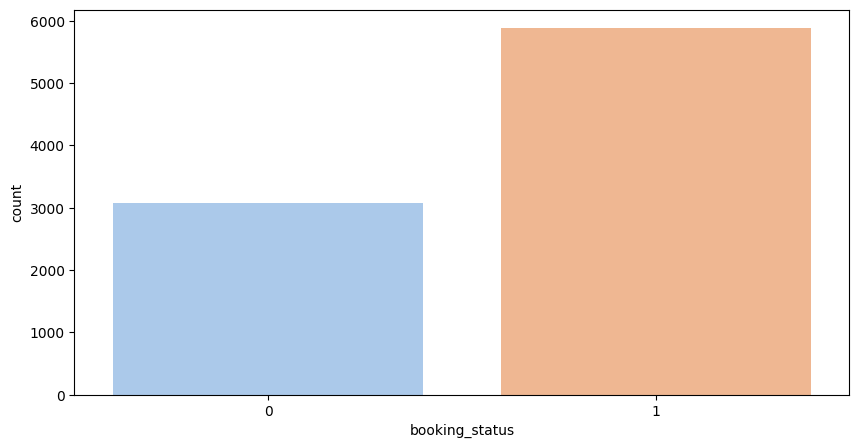

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='booking_status',data=df,palette='pastel')
plt.show()

In [ ]:
print(df['type_of_meal_plan'].unique())
print('There are {} unique labels'.format(df['type_of_meal_plan'].nunique()))

[0]
There are 1 unique labels


In [ ]:
df['type_of_meal_plan'].value_counts()

,count
type_of_meal_plan,
0,8957


<ipython-input-246-231b8cfe52ed>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




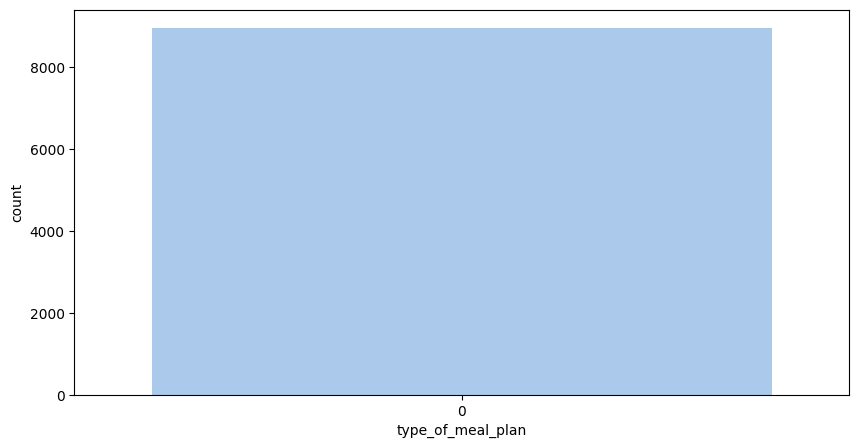

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='type_of_meal_plan',data=df,palette='pastel')
plt.show()

In [ ]:
print(df['room_type_reserved'].unique())
print('There are {} unique labels'.format(df['room_type_reserved'].nunique()))

[0]
There are 1 unique labels


In [ ]:
print(df['room_type_reserved'].value_counts())

room_type_reserved
0    8957
Name: count, dtype: int64


<ipython-input-249-94fdb301f0f6>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




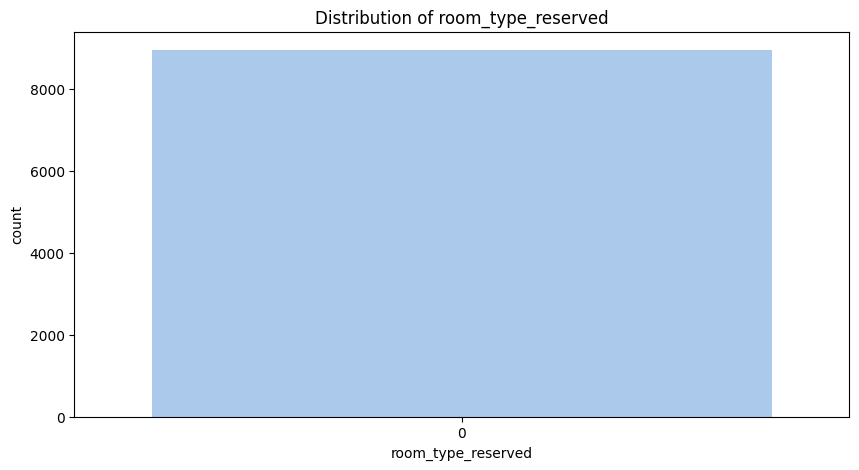

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='room_type_reserved',data=df,palette='pastel')
plt.title('Distribution of room_type_reserved')
plt.show()

In [ ]:
print(df['market_segment_type'].unique())
print('There are {} unique labels'.format(df['market_segment_type'].nunique()))

[4 3 2]
There are 3 unique labels


In [ ]:
print(df['market_segment_type'].value_counts())

market_segment_type
4    5378
3    3370
2     209
Name: count, dtype: int64


<ipython-input-252-e81db8ffebc9>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




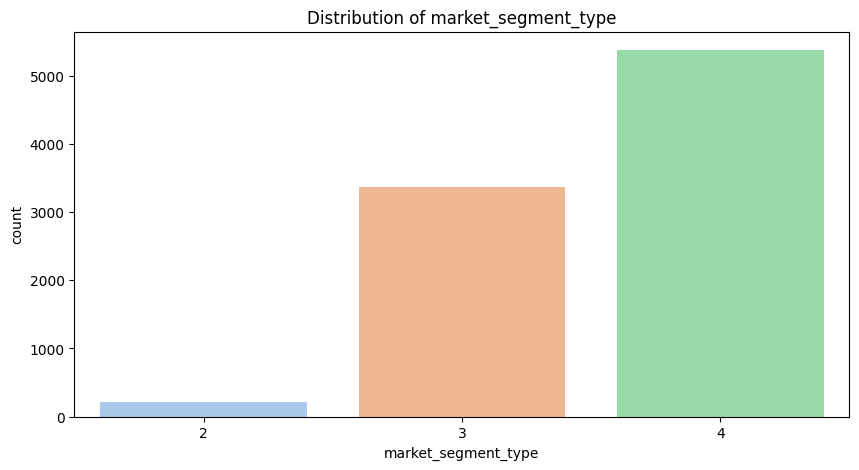

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='market_segment_type',data=df,palette='pastel')
plt.title('Distribution of market_segment_type')
plt.show()

# **Visualization using plotly**

In [ ]:
# line plot
fig = px.line(df.head(), x='lead_time', y='avg_price_per_room', title='Lead Time vs. Average Price per Room')
fig.show()

In [ ]:
# Area plot
fig = px.area(df.head(), x='arrival_date', y='avg_price_per_room', color='booking_status',
             title='Average Price per Room by Booking Status')
fig.show()

In [ ]:
# Histogram
fig = px.histogram(df, x="lead_time", title="Lead Time Distribution")
fig.show()


In [ ]:
# barplot
# Bar plot of average price per room for different market segments
avg_price_by_segment = df.groupby('market_segment_type')['avg_price_per_room'].mean().reset_index()
fig = px.bar(avg_price_by_segment, x='market_segment_type', y='avg_price_per_room', title='Average Price per Room by Market Segment')
fig.show()

In [ ]:
# pie chart

market_segment_counts = df['market_segment_type'].value_counts()
fig = px.pie(values=market_segment_counts.values, names=market_segment_counts.index, title='Market Segment Distribution')
fig.show()

In [ ]:
#boxplot
fig = px.box(df, y="avg_price_per_room", title="Box Plot")
fig.show()

In [ ]:
# scatter plot

fig = px.scatter(df.head(100), x="lead_time", y="avg_price_per_room", size="no_of_adults", color="booking_status")
fig.show()

#**PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_data)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head()

,principal component 1,principal component 2
0,0.110938,-2.083758
1,-0.478150,0.354336
2,0.902762,-0.936984
3,-0.224783,-0.557837
4,0.137719,-0.289578


In [ ]:
finalDf = pd.concat([principalDf, df[['booking_status']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,booking_status
0,0.110938,-2.083758,NaN
1,-0.478150,0.354336,NaN
2,0.902762,-0.936984,NaN
3,-0.224783,-0.557837,0.0
4,0.137719,-0.289578,NaN


#**Split Data**

In [ ]:
#Identify inputs and outputs
x=df.drop('booking_status',axis=1)
y=df['booking_status']

In [ ]:
# split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

#**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(x_train,y_train)
print('Training set Score :',log_r.score(x_train,y_train))
print('Test set Score :',log_r.score(x_test,y_test))

Training set Score : 0.8120912426224278
Test set Score : 0.8139880952380952


In [ ]:
predictions = log_r.predict(x_test)

In [ ]:
log_cm=confusion_matrix(y_test,predictions)
log_cm

array([[ 636,  317],
       [ 183, 1552]])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       953
           1       0.83      0.89      0.86      1735

    accuracy                           0.81      2688
   macro avg       0.80      0.78      0.79      2688
weighted avg       0.81      0.81      0.81      2688



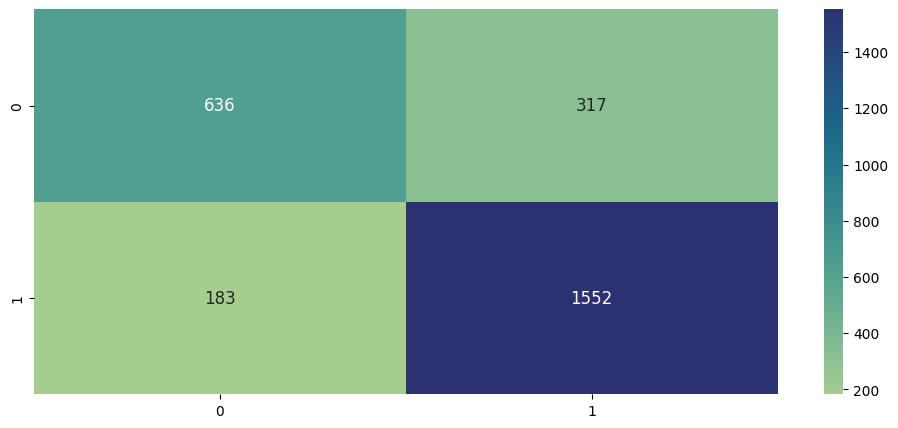

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(log_cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()

#**SVM**

In [ ]:
from sklearn.svm import SVC

svm=SVC()
svm.fit(x_train,y_train)
print('Training set Score :',svm.score(x_train,y_train))
print('Test set Score :',svm.score(x_test,y_test))

Training set Score : 0.8288403254107514
Test set Score : 0.8288690476190477


In [ ]:
predictions = svm.predict(x_test)

In [ ]:
SVM_cm=confusion_matrix(y_test,predictions)
SVM_cm

array([[ 622,  331],
       [ 129, 1606]])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73       953
           1       0.83      0.93      0.87      1735

    accuracy                           0.83      2688
   macro avg       0.83      0.79      0.80      2688
weighted avg       0.83      0.83      0.82      2688



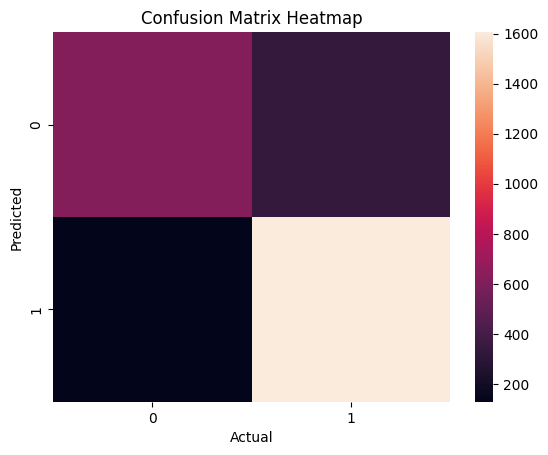

In [ ]:
sns.heatmap(SVM_cm,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# **KMEAN**

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train,y_train)
print('Training set Score :',kmeans.score(x_train,y_train))
print('Test set Score :',kmeans.score(x_test,y_test))

Training set Score : -29826.73145531861
Test set Score : -12843.23955677217


In [ ]:
y_pred =kmeans.predict(x_test)

In [ ]:
kmean_cm=confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.23      0.18      0.20       953
           1       0.55      0.30      0.39      1735
           2       0.00      0.00      0.00         0

    accuracy                           0.26      2688
   macro avg       0.26      0.16      0.20      2688
weighted avg       0.44      0.26      0.33      2688



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



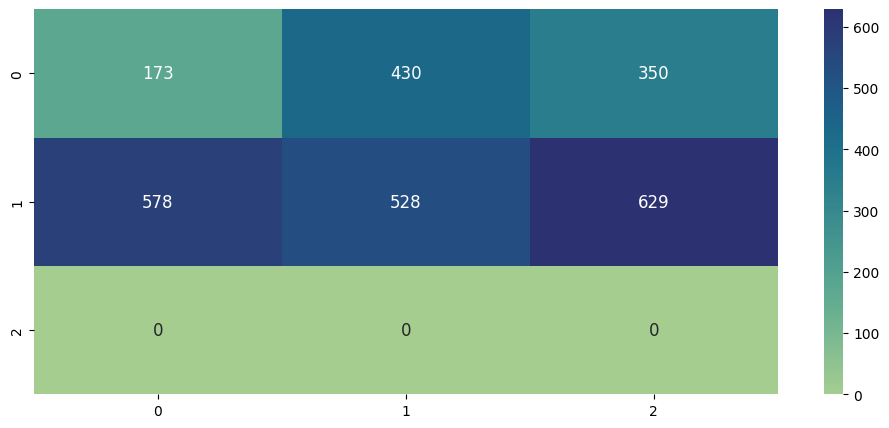

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(kmean_cm, annot=True, annot_kws={"size": 12},fmt="g", cmap="crest")
plt.show()

#**Machine Learning Alghorithms With Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
x_scaled=standard_scaler.fit_transform(x)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler=MinMaxScaler()
x_mm_scaled=mm_scaler.fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=0)

In [ ]:
X_train_standard,X_test_standard,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [ ]:
X_train_mmscaled,X_test_mmscaled,y_train,y_test=train_test_split(x_mm_scaled,y,test_size=0.3,random_state=0)

In [ ]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=0)

**Train based on standerd scaler**

In [ ]:
log_r.fit(X_train_standard,y_train)
y_pred=log_r.predict(X_test_standard)
acc_log_r_standard=f"{round(accuracy_score(y_test,y_pred),3)}%"
print("Accuracy of Logistic Regression is :" ,acc_log_r_standard)

Accuracy of Logistic Regression is : 0.814%


In [ ]:
svm.fit(X_train_standard,y_train)
y_pred=svm.predict(X_test_standard)
acc_svm_standard=f"{round(accuracy_score(y_test,y_pred),3)}%"
print("Accuracy of SVC is :" ,acc_svm_standard)

Accuracy of SVC is : 0.854%


In [ ]:
kmeans.fit(X_train_standard,y_train)
y_pred =kmeans.predict(X_test_standard)
acc_kmeans_standard=f"{round(accuracy_score(y_test,y_pred.round()),3)}%"
print("Accuracy of kmeans is :" ,acc_kmeans_standard)

Accuracy of kmeans is : 0.208%


**Train based on minimax scaler**

In [ ]:
log_r.fit(X_train_mmscaled,y_train)
y_pred=log_r.predict(X_test_mmscaled)
acc_log_r_mm=f"{round(accuracy_score(y_test,y_pred),3)}%"
print("Accuracy :" ,acc_log_r_mm)

Accuracy : 0.813%


In [ ]:
svm.fit(X_train_mmscaled,y_train)
y_pred=svm.predict(X_test_mmscaled)
acc_svm_mm=f"{round(accuracy_score(y_test,y_pred),3)}%"
print("Accuracy :" ,acc_svm_mm)

Accuracy : 0.84%


In [ ]:
kmeans.fit(X_train_mmscaled,y_train)
y_pred =kmeans.predict(X_test_mmscaled)
acc_kmeans_mm=f"{round(accuracy_score(y_test,y_pred.round()),3)}%"
print("Accuracy of kmeans is :" ,acc_kmeans_mm)

Accuracy of kmeans is : 0.464%


**Train based on pca**

In [ ]:
log_r.fit(X_train_pca,y_train)
y_pred=log_r.predict(X_test_pca)
acc_log_r_pca=f"{round(accuracy_score(y_test,y_pred),3)}%"
print("Accuracy :" ,acc_log_r_pca)

Accuracy : 0.814%


In [ ]:
svm.fit(X_train_pca,y_train)
y_pred=svm.predict(X_test_pca)
acc_svm_pca=f"{round(accuracy_score(y_test,y_pred),3)}%"
print("Accuracy :" ,acc_svm_pca)

Accuracy : 0.854%


In [ ]:
kmeans.fit(X_train_pca,y_train)
y_pred=kmeans.predict(X_test_pca)
acc_kmeans_pca=f"{round(accuracy_score(y_test,y_pred),3)}%"
print("Accuracy :" ,acc_kmeans_pca)

Accuracy : 0.382%
